In [1]:
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import PandasTools
from sklearn.preprocessing import StandardScaler 

# 读取数据表
data = pd.read_csv('t1.csv')  # 替换为您的数据表路径和名称
pre_data = pd.read_csv('t1-20241016.csv') 
# 分割训练集和验证集
train_data = data[data['group'] == 'training']
test_data = data[data['group'] == 'test']

PandasTools.AddMoleculeColumnToFrame(train_data,'smiles','Molecule')
PandasTools.AddMoleculeColumnToFrame(test_data,'smiles','Molecule')
PandasTools.AddMoleculeColumnToFrame(pre_data,'smiles','Molecule')

calc = Calculator(descriptors, ignore_3D=True)
X_train = pd.DataFrame(calc.pandas(train_data['Molecule']))
X_test = pd.DataFrame(calc.pandas(test_data['Molecule']))
X_pre = pd.DataFrame(calc.pandas(pre_data['Molecule']))

data1=pd.concat([X_train,X_test])
data1=pd.concat([data1,X_pre])
data1=data1._get_numeric_data()
y_train=train_data[train_data.columns[4]].values
y_test=test_data[test_data.columns[4]].values
y_pre=pre_data[pre_data.columns[4]].values
X_train=pd.concat([train_data.iloc[:,5:9],data1.iloc[:51,:]],axis=1)
X_test=pd.concat([test_data.iloc[:,5:9],data1.iloc[51:63,:]],axis=1)
X_pre=pd.concat([pre_data.iloc[:,5:9],data1.iloc[63:,:]],axis=1)


E:\Anaconda\lib\site-packages\rdkit\Chem\PandasTools.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.87it/s]


In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_pre = scaler.transform(X_pre)

In [14]:
X_pre

array([[ 0.98058068, -0.58489765, -0.5547002 , ..., -1.54661296,
        -1.19902064, -1.42981997],
       [ 0.98058068, -0.58489765, -0.5547002 , ..., -0.59070051,
         0.30729288, -0.53788281],
       [ 0.98058068, -0.58489765, -0.5547002 , ..., -1.74938227,
        -1.35279015, -1.61811782],
       [ 0.98058068, -0.58489765, -0.5547002 , ..., -0.76450277,
        -1.02642222, -1.04331387],
       [ 0.98058068, -0.58489765, -0.5547002 , ...,  0.04657446,
         0.20373383, -0.21083918],
       [ 0.98058068, -0.58489765, -0.5547002 , ...,  2.07426755,
         0.98827212,  0.52253138]])

In [15]:
import warnings
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import sklearn.metrics                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials

from sklearn.svm import SVR

# 定义超参数空间
space = {
    'C': hp.loguniform('C', -5, 2),
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
    'degree': hp.quniform('degree', 1, 5, 1),
    'gamma': hp.loguniform('gamma', -5, 2),
    'max_iter':hp.choice('max_iter', (100,200,300,400,500))
}

# 定义目标函数
def objective(params):
    # 构建SVR模型
    model = SVR(
        C=params['C'],
        kernel=params['kernel'],
        degree=params['degree'],
        max_iter=params['max_iter'],
        gamma=params['gamma']
    )

    # 计算交叉验证的均方根误差（RMSE）
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

    # 返回平均RMSE作为目标值
    return np.mean(cv_rmse)

# 运行超参数优化
trials = Trials()
best = fmin(
    objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

# 输出最佳超参数
print("Best Hyperparameters:")
print(best)

100%|███████████████████████████████████████████████████| 50/50 [00:02<00:00, 22.15it/s, best loss: 0.6860867864524929]
Best Hyperparameters:
{'C': 0.017090616423251388, 'degree': 5.0, 'gamma': 0.0068078887753916266, 'kernel': 3, 'max_iter': 1}


In [77]:
print("Best Hyperparameters:")
print(best)

Best Hyperparameters:
{'C': 0.015306696069640871, 'degree': 1.0, 'gamma': 0.28240403521412416, 'kernel': 0, 'max_iter': 4}


Training Set - R2: 0.7008, MAE: 0.2387, RMSE: 0.4145
Validation Set - R2: 0.5269, MAE: 0.4451, RMSE: 0.5729


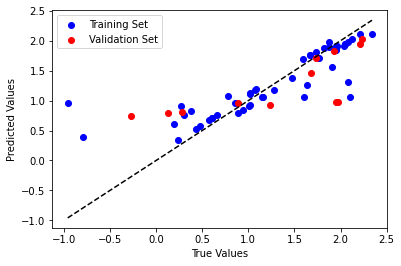

In [3]:
import warnings
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
model= SVR(C=1.468119983100809, degree=5.0, gamma= 0.05593755897562893, kernel='rbf', max_iter=300)


model.fit(X_train, y_train)

# 在训练集和验证集上进行预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算 R2 分数
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_test, y_test_pred)

# 计算 MAE 和 MSE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 打印结果
print("Training Set - R2: {:.4f}, MAE: {:.4f}, RMSE: {:.4f}".format(r2_train, mae_train, rmse_train))
print("Validation Set - R2: {:.4f}, MAE: {:.4f}, RMSE: {:.4f}".format(r2_val, mae_val, rmse_val))

# 绘制散点图
plt.scatter(y_train, y_train_pred, color='blue', label='Training Set')
plt.scatter(y_test, y_test_pred, color='red', label='Validation Set')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [5]:
y_pre_pred = model.predict(X_pre)
pd.DataFrame(y_pre, y_pre_pred).to_csv("logt-pre-SVM.csv")

In [18]:
pd.DataFrame(y_train, y_train_pred).to_csv("logt-train-SVM.csv")
pd.DataFrame(y_test, y_test_pred).to_csv("logt-test-SVM.csv")
pd.DataFrame(y_pre, y_pre_pred).to_csv("logt-pre-SVM.csv")

In [ ]:
###
#SVM1 logt
#SVR(C=1.468119983100809, degree=5.0, gamma= 0.05593755897562893, kernel='rbf', max_iter=300)
#Training Set - R2: 0.7008, MAE: 0.2387, RMSE: 0.4145
#Validation Set - R2: 0.5269, MAE: 0.4452, RMSE: 0.5730
###

###
#SVM2
